In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder

In [3]:
csv_data_path = "ObesityDataSet.csv"
df = pd.read_csv(csv_data_path)

In [4]:
display(df.head(10))
print(df.info())
print('Shape:', df.shape)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
df.describe(include = 'object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [5]:
# check the Skewness and the Kurtosis of the numerical data
skewness = (
    df.select_dtypes("number")
    .skew()
    .reset_index()
    .rename(columns={"index": "variable", 0: "skewness"})
)
kurtosis = (
    df.select_dtypes("number")
    .kurtosis()
    .reset_index()
    .rename(columns={"index": "variable", 0: "kurtosis"})
)
skewness_kurtosis = pd.concat([skewness, kurtosis["kurtosis"]], axis=1)
skewness_kurtosis.round(2).style.format(precision=2).background_gradient(
    vmax=3, vmin=-1, cmap="Blues"
)

,variable,skewness,kurtosis
0,Age,1.53,2.83
1,Height,-0.01,-0.56
2,Weight,0.26,-0.70
3,FCVC,-0.43,-0.64
4,NCP,-1.11,0.39
5,CH2O,-0.10,-0.88
6,FAF,0.50,-0.62
7,TUE,0.62,-0.55


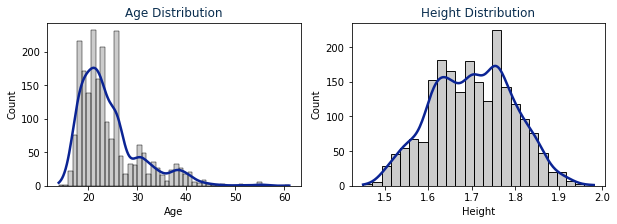

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax1 = sns.histplot(
    data= df,
    x="Age",
    kde=True,
    alpha=0.2,
    color="black",
    line_kws={"linewidth": 2.5},
    ax=ax[0],
)
ax2 = sns.histplot(
    data= df,
    x="Height",
    kde=True,
    alpha=0.2,
    color="black",
    line_kws={"linewidth": 2.5},
    ax=ax[1],
)
ax1.set_title("Age Distribution", fontsize=12, color="#0a2e4f")
ax2.set_title("Height Distribution", fontsize=12, color="#0a2e4f")
ax1.lines[0].set_color("#0b2494")
ax2.lines[0].set_color("#0b2494")
plt.show()

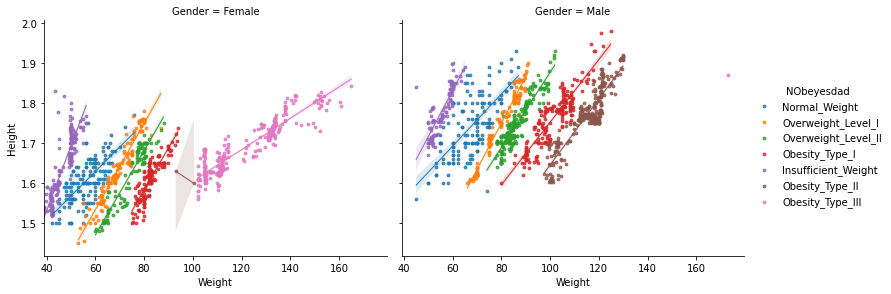

In [8]:
sns.lmplot(
    data=df,
    x="Weight",
    y="Height",
    col="Gender",
    height=4,
    aspect=1.3,
    hue="NObeyesdad",
    scatter_kws={"s": 8},
    line_kws={"linewidth": 1},
    palette="tab10",
)
plt.show()

In [9]:
df[["Gender", "NObeyesdad"]].value_counts().reset_index().style.format(
    precision=2
).background_gradient(cmap="Blues")

,Gender,NObeyesdad,count
0,Female,Obesity_Type_III,323
1,Male,Obesity_Type_II,295
2,Male,Obesity_Type_I,195
3,Male,Overweight_Level_II,187
4,Female,Insufficient_Weight,173
5,Female,Obesity_Type_I,156
6,Male,Normal_Weight,146
7,Female,Overweight_Level_I,145
8,Male,Overweight_Level_I,145
9,Female,Normal_Weight,141


In [9]:
from sklearn.preprocessing import LabelEncoder

# 假设df是你的DataFrame
columns_to_encode = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
    'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad'
]
# 初始化一个字典来存储每个列的LabelEncoder
encoders = {}

for column in columns_to_encode:
    # 对每个列创建一个新的LabelEncoder实例
    encoder = LabelEncoder()
    # 使用fit_transform方法对列进行编码
    df[column] = encoder.fit_transform(df[column])
    # 将编码后的LabelEncoder实例保存到字典中
    encoders[column] = encoder

# 现在你可以打印或者查看每个列的原始标签和编码
for column, encoder in encoders.items():
    # 使用encoder的classes_属性来获取原始标签列表
    original_labels = encoder.classes_
    # 使用transform方法获取所有原始标签的编码
    encoded_labels = encoder.transform(original_labels)
    # 打印原始标签和对应的编码
    print(f'Column: {column}')
    for original, encoded in zip(original_labels, encoded_labels):
        print(f'{original} => {encoded}')
    print()  # 空行分隔不同的列


Column: Gender
Female => 0
Male => 1

Column: family_history_with_overweight
no => 0
yes => 1

Column: FAVC
no => 0
yes => 1

Column: CAEC
Always => 0
Frequently => 1
Sometimes => 2
no => 3

Column: SMOKE
no => 0
yes => 1

Column: SCC
no => 0
yes => 1

Column: CALC
Always => 0
Frequently => 1
Sometimes => 2
no => 3

Column: MTRANS
Automobile => 0
Bike => 1
Motorbike => 2
Public_Transportation => 3
Walking => 4

Column: NObeyesdad
Insufficient_Weight => 0
Normal_Weight => 1
Obesity_Type_I => 2
Obesity_Type_II => 3
Obesity_Type_III => 4
Overweight_Level_I => 5
Overweight_Level_II => 6



In [10]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [15]:
corr = df.corr()
print(corr)

                                  Gender       Age    Height    Weight  \
Gender                          1.000000  0.048394  0.618466  0.161668   
Age                             0.048394  1.000000 -0.025958  0.202560   
Height                          0.618466 -0.025958  1.000000  0.463136   
Weight                          0.161668  0.202560  0.463136  1.000000   
family_history_with_overweight  0.102512  0.205725  0.247684  0.496820   
FAVC                            0.064934  0.063902  0.178364  0.272300   
FCVC                           -0.274505  0.016291 -0.038121  0.216125   
NCP                             0.067600 -0.043944  0.243672  0.107469   
CAEC                            0.091543  0.083739  0.048818  0.287493   
SMOKE                           0.044698  0.091987  0.055499  0.025746   
CH2O                            0.107930 -0.045304  0.213376  0.200575   
SCC                            -0.102633 -0.116283 -0.133753 -0.201906   
FAF                             0.1896

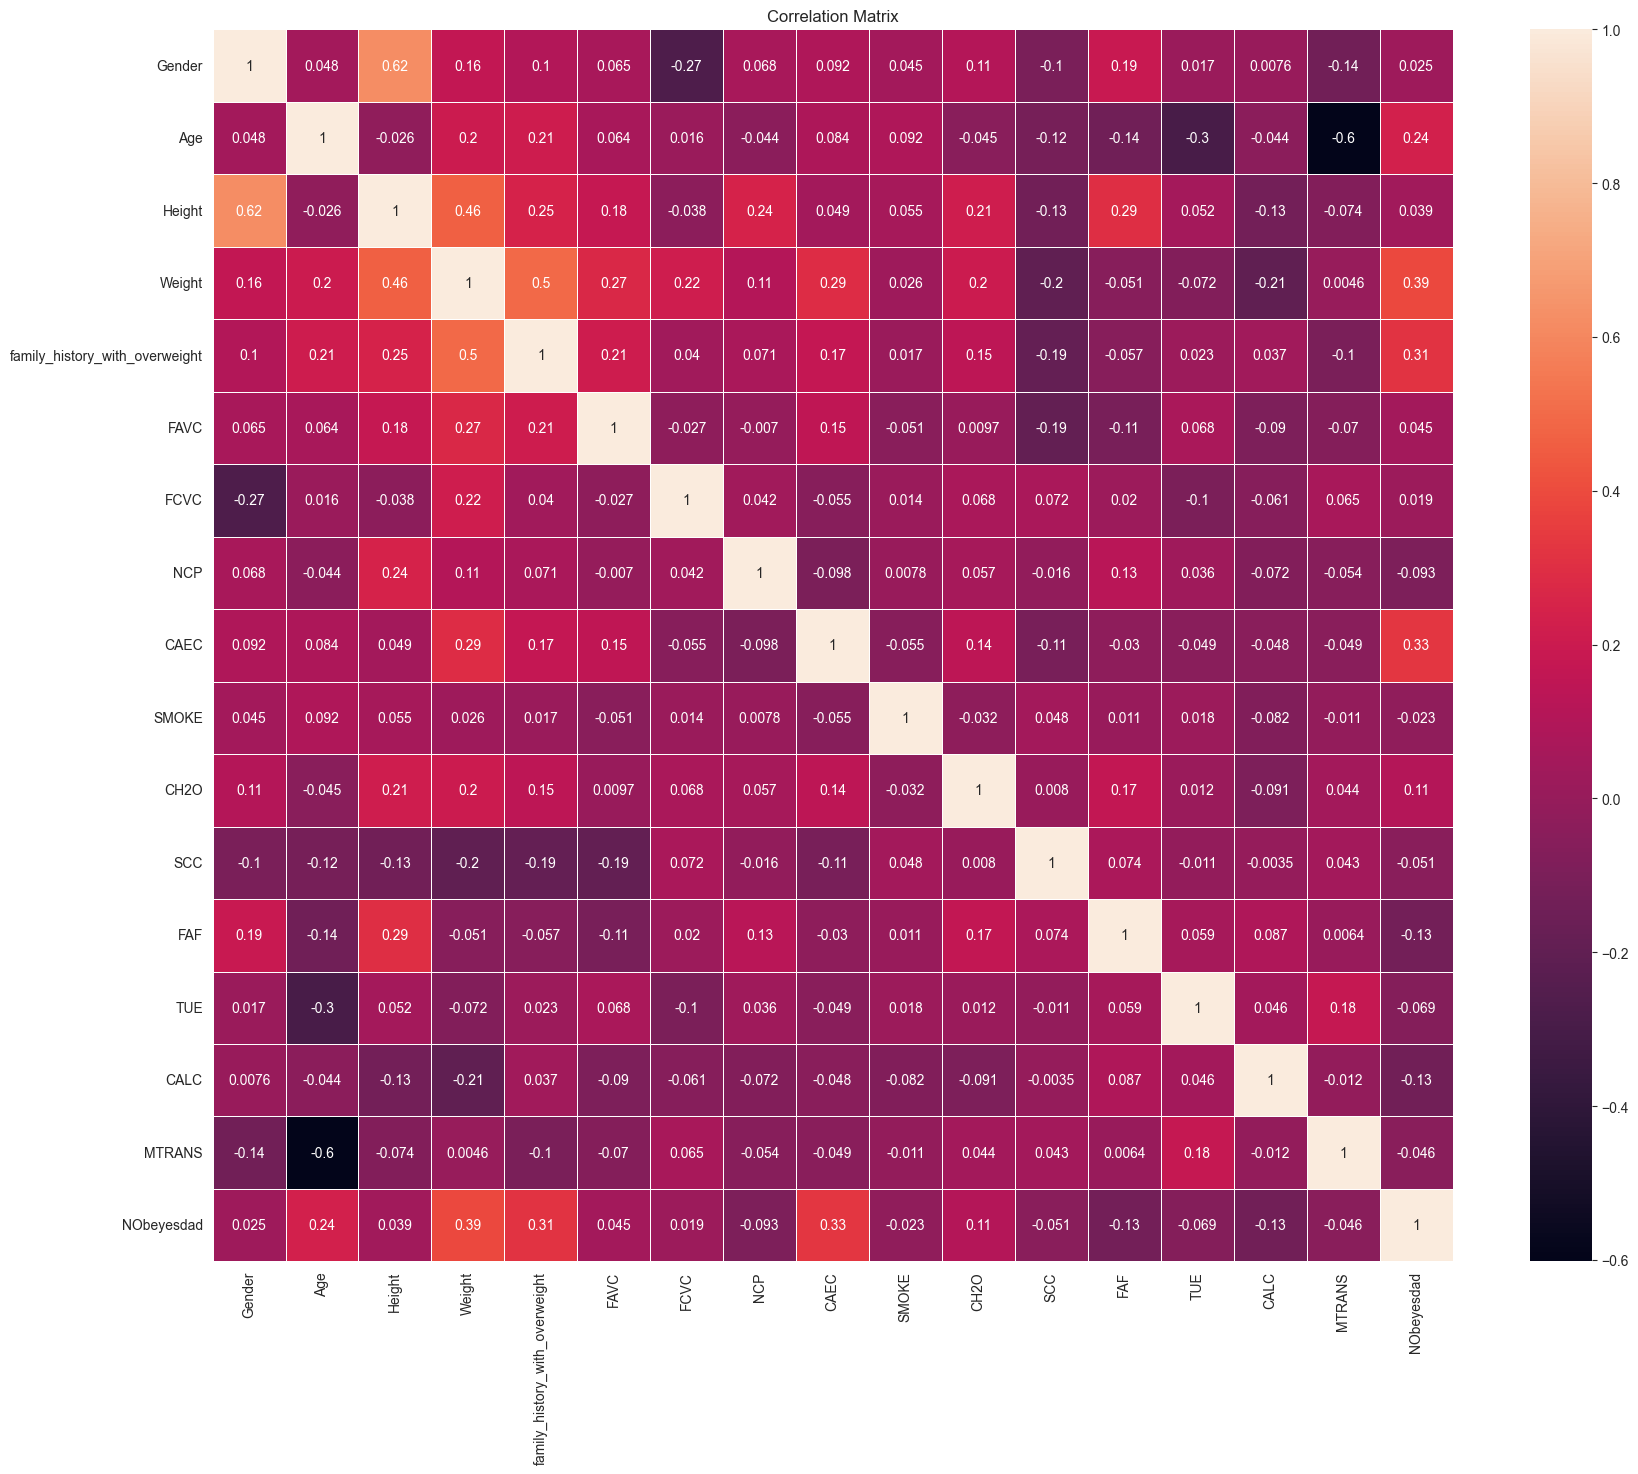

In [12]:
plt.figure(figsize = (20,16))

sns.heatmap(corr,annot=True, linewidth=0.5)

plt.title('Correlation Matrix')

plt.show()

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int32  
 9   SMOKE                           2111 non-null   int32  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int32  
 12  FAF                             21

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# 假设df是你的DataFrame

# 分割数据集为特征和标签
X = df.drop('NObeyesdad', axis=1)  # 特征
y = df['NObeyesdad']  # 标签
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 对数据进行标准化处理
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 创建kNN分类器实例，你可以通过调整n_neighbors的值来改变k的大小
knn = KNeighborsClassifier(n_neighbors=5)

# 训练模型
knn.fit(X_train, y_train)

# 进行预测
y_pred = knn.predict(X_test)

# 评估模型
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[51  3  0  0  0  2  0]
 [17 28  6  0  0  2  9]
 [ 0  0 72  2  0  1  3]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 3  9  4  0  0 38  2]
 [ 1  2  3  3  1  2 38]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        56
           1       0.67      0.45      0.54        62
           2       0.84      0.92      0.88        78
           3       0.92      0.98      0.95        58
           4       0.98      1.00      0.99        63
           5       0.84      0.68      0.75        56
           6       0.73      0.76      0.75        50

    accuracy                           0.82       423
   macro avg       0.81      0.82      0.81       423
weighted avg       0.82      0.82      0.81       423



In [16]:
# 定义kNN预测函数
def predict_knn(features):
    # 将输入的特征值转换成numpy数组，并重塑为1个样本的数据形状
    features_array = np.array(features).reshape(1, -1)

    # 使用之前训练好的标准化处理器来标准化特征值
    features_scaled = scaler.transform(features_array)

    # 使用训练好的kNN模型来做出预测
    prediction = knn.predict(features_scaled)

    # 返回预测结果
    return prediction[0]

In [17]:
features = [1, 22, 1.75, 85, 1, 1, 3, 3, 1, 0, 2, 0, 0.5, 1, 3, 0]

result = predict_knn(features)
print('Predicted class:', result)
# 0-> normal

Predicted class: 0


D:\PyWork\FlaskProject\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
